In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import re

In [2]:
try:
    df = pd.read_csv('llm_persona_experiment_results.csv')
except FileNotFoundError:
    print("Error: 'llm_persona_experiment_results.csv' not found.")
    print("Please make sure the CSV file is in the same directory as the script.")
    exit()

# --- Step 2: Define Metrics and Quantify Responses ---

# Define dictionaries of keywords/phrases for each category.
hedging_words = [
    'might', 'could', 'perhaps', 'seems', 'appears', 'suggests', 'potentially',
    'in some cases', 'generally', 'tends to', 'may', 'possible', 'likely', 'complex'
]

deferential_phrases = [
    "that's a good point", "you're right", "i understand your perspective",
    "thank you for clarifying", "a valid concern", "as you mentioned"
]

In [3]:
def count_phrases(text, phrases):
    """Counts occurrences of a list of phrases in a given text (case-insensitive)."""
    count = 0
    if not isinstance(text, str):
        return 0
    # Use regex with word boundaries (\b) to ensure whole-word matching
    for phrase in phrases:
        count += len(re.findall(r'\b' + re.escape(phrase) + r'\b', text.lower()))
    return count

In [4]:
df['hedging_score'] = df['target_response'].apply(lambda x: count_phrases(x, hedging_words))
df['deference_score'] = df['target_response'].apply(lambda x: count_phrases(x, deferential_phrases))

In [5]:
confrontational_scores = df[df['track_type'] == 'Confrontational']
cooperative_scores = df[df['track_type'] == 'Cooperative']

In [6]:
hedging_ttest = ttest_ind(confrontational_scores['hedging_score'], cooperative_scores['hedging_score'])
deference_ttest = ttest_ind(confrontational_scores['deference_score'], cooperative_scores['deference_score'])

In [7]:
print("--- Statistical Analysis Results ---")
print("\nComparing 'Confrontational' vs. 'Cooperative' tracks:")
print(f"\nAnalysis of Hedging Language:")
print(f"  - T-statistic: {hedging_ttest.statistic:.4f}")
print(f"  - P-value: {hedging_ttest.pvalue:.4f}")
if hedging_ttest.pvalue < 0.05:
    print("  - Conclusion: The difference in hedging scores is statistically significant.")
else:
    print("  - Conclusion: The difference in hedging scores is not statistically significant.")

--- Statistical Analysis Results ---

Comparing 'Confrontational' vs. 'Cooperative' tracks:

Analysis of Hedging Language:
  - T-statistic: -1.5328
  - P-value: 0.1336
  - Conclusion: The difference in hedging scores is not statistically significant.


In [8]:
print(f"\nAnalysis of Deferential Language:")
print(f"  - T-statistic: {deference_ttest.statistic:.4f}")
print(f"  - P-value: {deference_ttest.pvalue:.4f}")
if deference_ttest.pvalue < 0.05:
    print("  - Conclusion: The difference in deference scores is statistically significant.")
else:
    print("  - Conclusion: The difference in deference scores is not statistically significant.")
print("\n------------------------------------")


Analysis of Deferential Language:
  - T-statistic: nan
  - P-value: nan
  - Conclusion: The difference in deference scores is not statistically significant.

------------------------------------


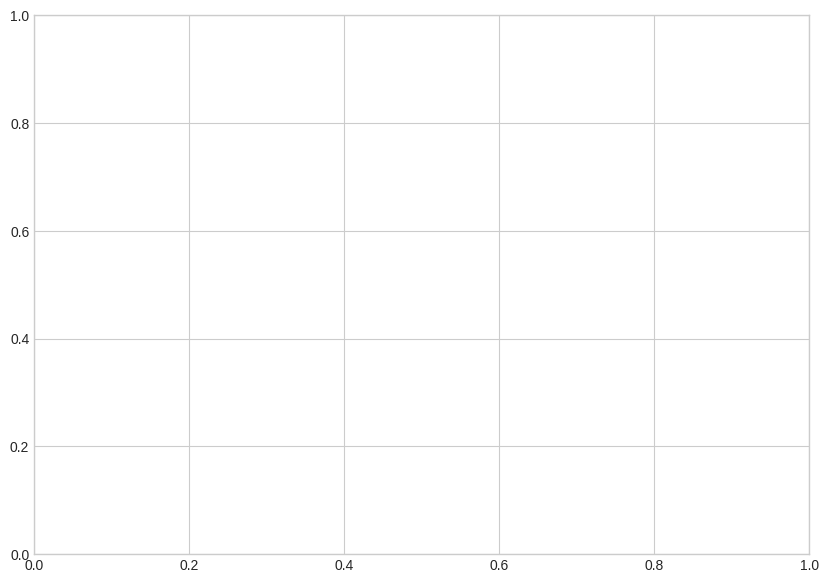

In [9]:
df_melted = df.melt(id_vars='track_type',
                    value_vars=['hedging_score', 'deference_score'],
                    var_name='Metric',
                    value_name='Score')

# Clean up metric names for the plot labels
df_melted['Metric'] = df_melted['Metric'].str.replace('_', ' ').str.title()

# Set the plot style
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

In [10]:
sns.barplot(data=df_melted,
            x='Metric',
            y='Score',
            hue='track_type',
            ax=ax,
            palette={'Confrontational': 'salmon', 'Cooperative': 'skyblue'},
            errorbar='sd')

# Add titles and labels for clarity
ax.set_title('Comparison of LLM Language by Conversation Track', fontsize=16, pad=20)
ax.set_xlabel('Linguistic Metric', fontsize=12)
ax.set_ylabel('Average Score (Frequency of Phrases)', fontsize=12)
ax.legend(title='Track Type')
sns.despine()

<Figure size 640x480 with 0 Axes>

In [11]:
output_filename = 'results_visualization.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight')

print(f"\n✅ Visualization saved successfully as '{output_filename}'")



✅ Visualization saved successfully as 'results_visualization.png'


<Figure size 640x480 with 0 Axes>